In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

# Comparison with Different Number of Neurons in Hidden Layer

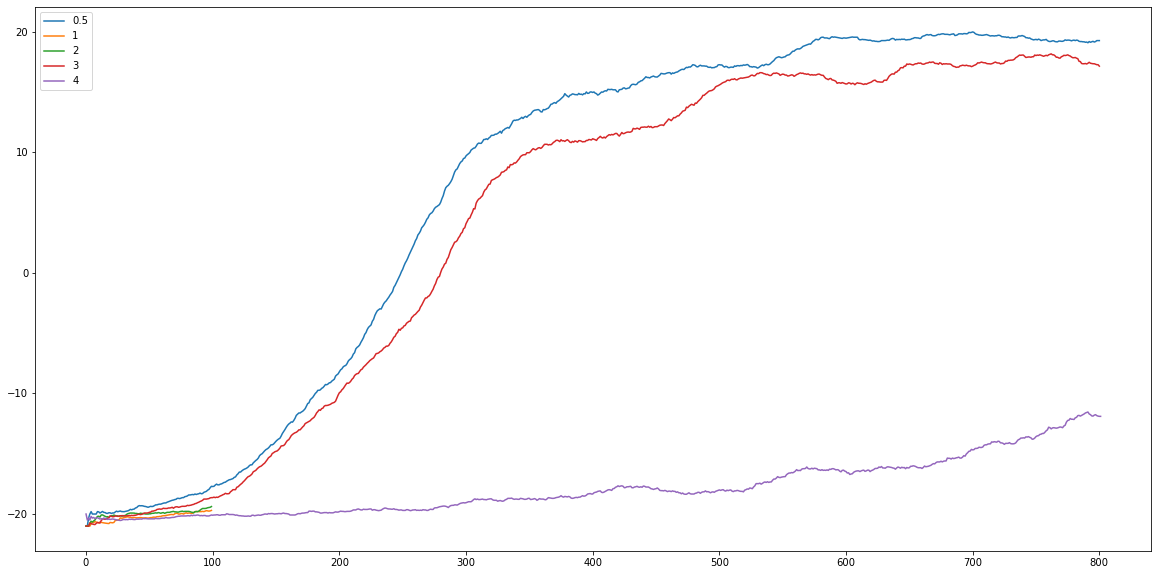

In [2]:
# PPO_TF2
# Dense(512, activation="elu", kernel_initializer='he_uniform')
#mean_rewards_experiment_0 = pd.read_csv('PPO_TF2_mean_rewards_20220810213523.csv', index_col='Unnamed: 0') # 100 Eps
mean_rewards_experiment_05 = pd.read_csv('PPO_TF2_mean_rewards_20220811_091620.csv', index_col='Unnamed: 0')

# Dense(64, activation="elu", kernel_initializer='he_uniform')
mean_rewards_experiment_1 = pd.read_csv('PPO_TF2_mean_rewards_20220810222837.csv', index_col='Unnamed: 0') # 100 Eps
mean_rewards_experiment_2 = pd.read_csv('PPO_TF2_mean_rewards_20220811074852.csv', index_col='Unnamed: 0') # 100 Eps

# Dense(256, activation="elu", kernel_initializer='he_uniform')(X)
mean_rewards_experiment_3 = pd.read_csv('PPO_TF2_mean_rewards_20220811_091518.csv', index_col='Unnamed: 0')

# Dense(4, activation="elu", kernel_initializer='he_uniform')
mean_rewards_experiment_4 = pd.read_csv('PPO_TF2_mean_rewards_20220811_083648.csv', index_col='Unnamed: 0') # 800 Eps, saved model: PongDeterministic-v4_APPO_0.0001_Actor_Dense4



plt.plot(mean_rewards_experiment_05, label = "0.5")
plt.plot(mean_rewards_experiment_1, label = "1")
plt.plot(mean_rewards_experiment_2, label = "2")                                                                                                             
plt.plot(mean_rewards_experiment_3, label = "3")
plt.plot(mean_rewards_experiment_4, label = "4")
plt.legend()

# Outcome reliability analysis

In [3]:
orc1 = pd.read_csv('mean_rewards_0813_12-41-59_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison.csv', index_col='Episode')
orc2 = pd.read_csv('mean_rewards_0814_07-43-45_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison.csv', index_col='Episode')
orc3 = pd.read_csv('mean_rewards_0814_22-42-14_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison0.csv', index_col='Episode')
orc4 = pd.read_csv('mean_rewards_0815_08-00-13_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison0.csv', index_col='Episode')
orc5 = pd.read_csv('mean_rewards_0815_18-21-55_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison0.csv', index_col='Episode')
orc6 = pd.read_csv('mean_rewards_0816_06-58-45_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison0.csv', index_col='Episode')
orc7 = pd.read_csv('mean_rewards_0816_14-39-46_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison0.csv', index_col='Episode')
orc8 = pd.read_csv('mean_rewards_0816_22-45-19_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison0.csv', index_col='Episode')
orc9 = pd.read_csv('mean_rewards_0817_23-07-13_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison0.csv', index_col='Episode')

242
354
288
280
239
238
378
255
213
average: 276.3333333333333


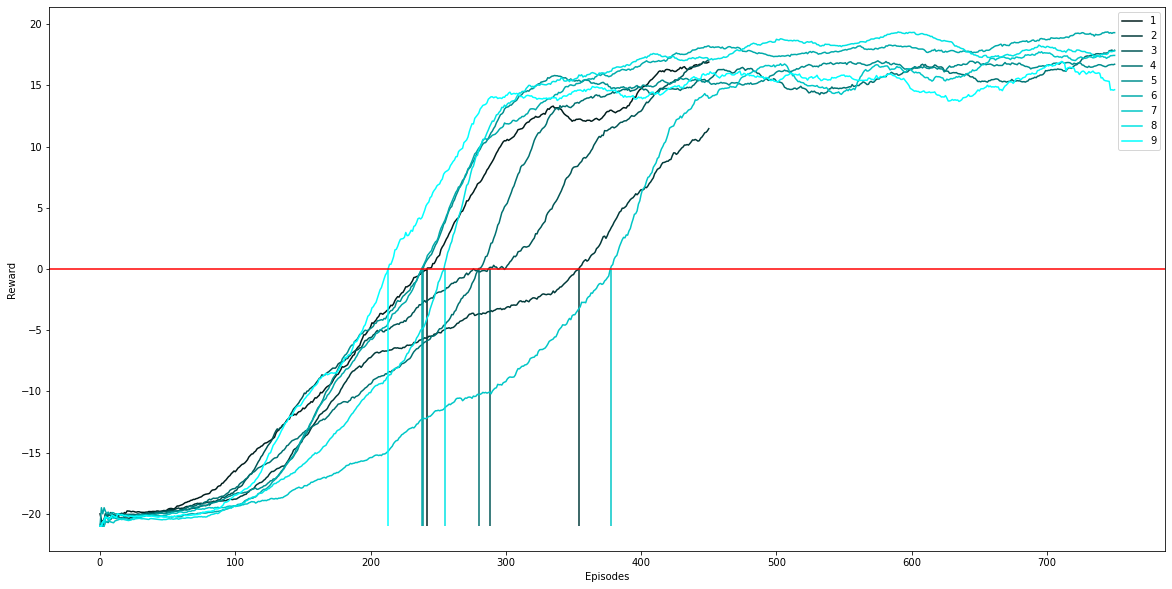

In [4]:
wins = []
for i in range(9):
    df_no = i+1
    series_MoAv = eval('orc{}'.format(df_no))['Moving Average Score (n=50)'] #['Score']#
    col = (0,df_no/9,df_no/9)
    plt.plot(series_MoAv, label = df_no, color=col)
    #get first positive value above 0
    first_win = series_MoAv[series_MoAv>0].index[0]
    plt.vlines(x=first_win, ymin=-21, ymax=0, color=col)
    print(first_win)
    wins.append(first_win)
    

plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Reward")
print("average: " + str(sum(wins)/len(wins)))


# Plotting 4th Run Only

Text(0, 0.5, 'Reward')

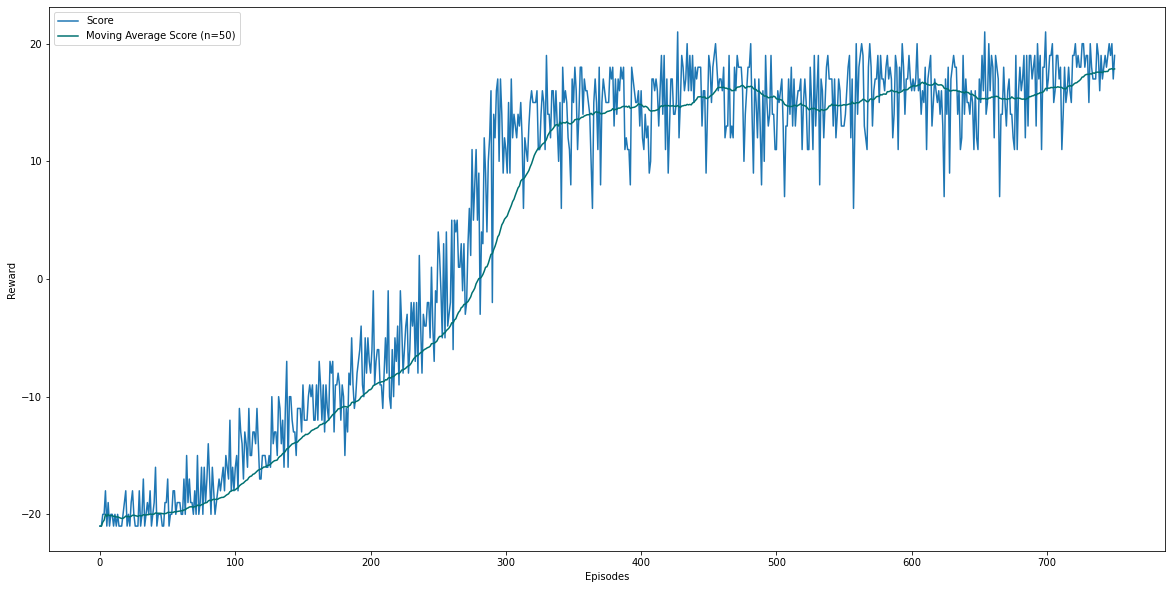

In [5]:
plt.plot(orc4['Score'], label = 'Score')
plt.plot(orc4['Moving Average Score (n=50)'], color = (0,4/9,4/9), label = 'Moving Average Score (n=50)')

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Reward")

# PPO With Excessively Large EPOCHS Hyperparameter

Text(0, 0.5, 'Reward')

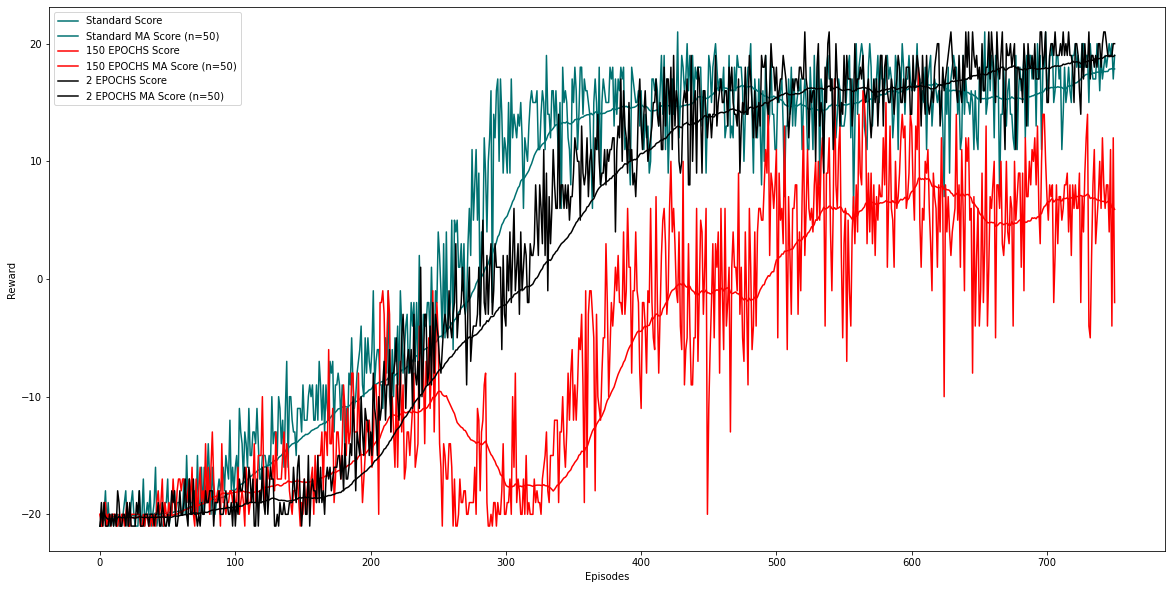

In [6]:
large_epoch = pd.read_csv('mean_rewards_0822_18-53-58_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison_150EpochsForNN0.csv', index_col='Episode')
small_epoch = pd.read_csv('mean_rewards_0823_07-08-10_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison_2EpochsForNN0.csv', index_col='Episode')

plt.plot(orc4['Score'], color = (0,4/9,4/9), label = 'Standard Score')
plt.plot(orc4['Moving Average Score (n=50)'], color = (0,4/9,4/9), label = 'Standard MA Score (n=50)')

plt.plot(large_epoch['Score'], color = 'r', label = '150 EPOCHS Score')
plt.plot(large_epoch['Moving Average Score (n=50)'], color = 'r', label = '150 EPOCHS MA Score (n=50)')

plt.plot(small_epoch['Score'], color = 'black', label = '2 EPOCHS Score')
plt.plot(small_epoch['Moving Average Score (n=50)'], color = 'black', label = '2 EPOCHS MA Score (n=50)')

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Reward")

# Separate NN Comparison

In [7]:
sep1 = pd.read_csv('mean_rewards_0902_17-33-45_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison_separateNN_sequential.csv', index_col='Episode')
sep2 = pd.read_csv('mean_rewards_0904_21-16-18_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison_separateNN_sequential.csv', index_col='Episode')
sep3 = pd.read_csv('mean_rewards_0904_21-16-53_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison_separateNN_sequential.csv', index_col='Episode')
sep4 = pd.read_csv('mean_rewards_0905_08-14-24_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison_separateNN_sequential.csv', index_col='Episode')
sep5 = pd.read_csv('mean_rewards_0905_09-38-00_5_0.0001_0.2_Dense_512_OutcomeReliabilityComparison_separateNN_sequential.csv', index_col='Episode')

Text(0, 0.5, 'Reward')

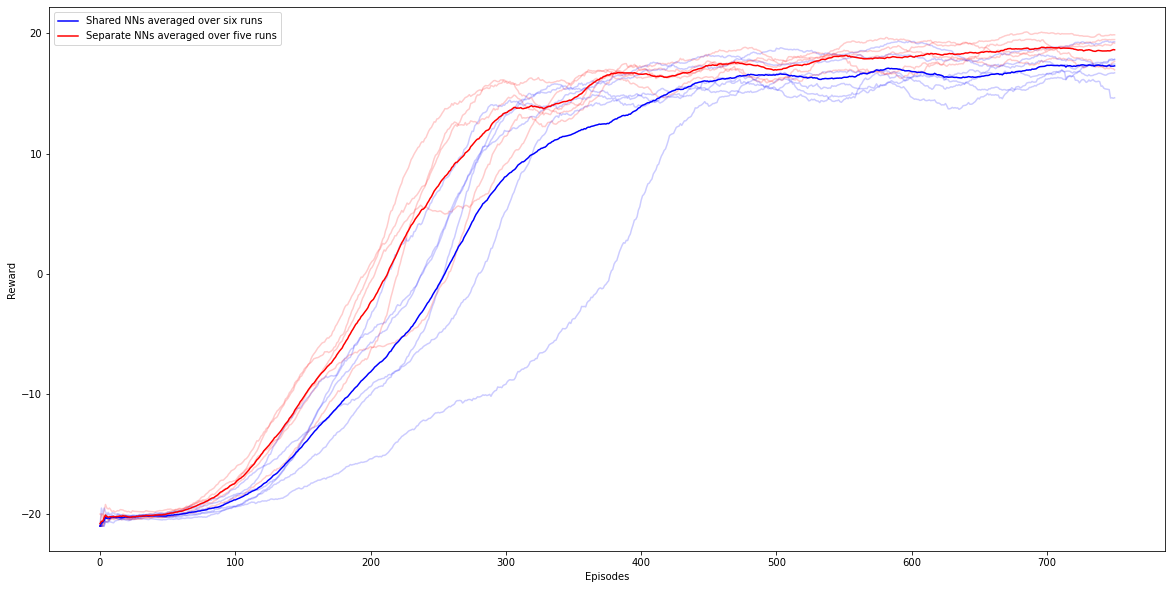

In [8]:
#plt.plot(orc4['Score'], label = 'Score')

alpha = 0.2

plt.plot(sep1['Moving Average Score (n=50)'], color='r', alpha=alpha)
plt.plot(sep2['Moving Average Score (n=50)'], color='r', alpha=alpha)
plt.plot(sep3['Moving Average Score (n=50)'], color='r', alpha=alpha)
plt.plot(sep4['Moving Average Score (n=50)'], color='r', alpha=alpha)
plt.plot(sep5['Moving Average Score (n=50)'], color='r', alpha=alpha)

for i in range(9-3):
    df_no = i+1+3
    series_orc = eval('orc{}'.format(df_no))['Moving Average Score (n=50)'] #['Score']#
    col = 'b'
    plt.plot(series_orc, color=col, alpha=alpha)#, label = df_no)

sep_average = (
    sep1['Moving Average Score (n=50)'] + 
    sep2['Moving Average Score (n=50)'] +
    sep3['Moving Average Score (n=50)'] +
    sep4['Moving Average Score (n=50)'] +
    sep5['Moving Average Score (n=50)'] 
)/5

orc_average = (
    orc4['Moving Average Score (n=50)'] +
    orc5['Moving Average Score (n=50)'] +
    orc6['Moving Average Score (n=50)'] +
    orc7['Moving Average Score (n=50)'] +
    orc8['Moving Average Score (n=50)'] +
    orc9['Moving Average Score (n=50)'] 
)/6

plt.plot(orc_average, color='blue', label='Shared NNs averaged over six runs')
plt.plot(sep_average, color='r', label='Separate NNs averaged over five runs')

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Reward")

plt.show()